# Problem Statement

Using a fraud_dataset predict whether the customer will be defaulters or not.

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing CSV file

In [3]:
df = pd.read_csv("fraud_dataset.csv")

# **Analysing the Data**

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0


In [ ]:
#checking number of rows and columns

In [4]:
df.shape

(827, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


In [ ]:
#this is a classification problem .Trying to get percentage of defaulters and non defaulter

In [8]:
count_fraud = len(df[df['Fraud_Risk']==1])
count_non_fraud = len(df[df['Fraud_Risk']==0])
non_fraud = count_non_fraud/(count_non_fraud +count_fraud)
print("percentage of non Fraud Risk =", round(non_fraud*100,2))
fraud = count_fraud/(count_non_fraud +count_fraud)
print("percentage of Fraud Risk =", round(fraud*100,2))

percentage of non Fraud Risk = 42.32
percentage of Fraud Risk = 57.68


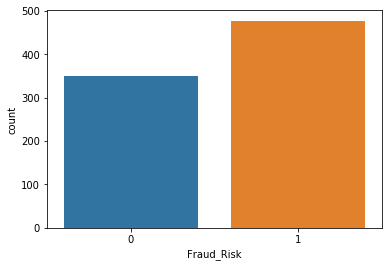

In [10]:
sns.countplot(x='Fraud_Risk',data=df)
plt.show()

# Data Cleaning 

In [6]:
df.isna().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

In [ ]:
#no missing value is seen

# Exploratory Data Analysis

In [ ]:
#finding correlation with help of heat map

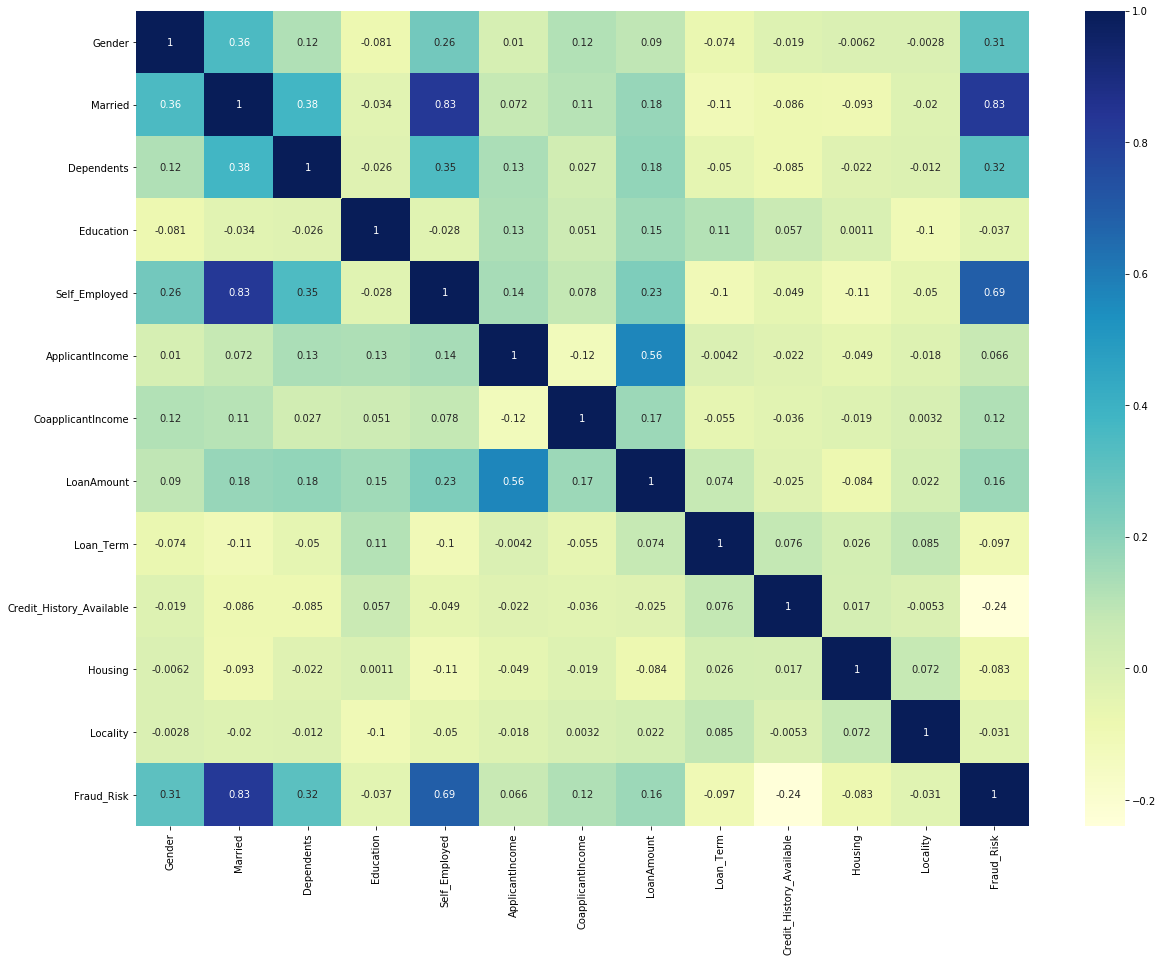

In [11]:
corr=df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

In [12]:
cor= corr['Fraud_Risk']
cor

Gender                      0.309570
Married                     0.825064
Dependents                  0.315421
Education                  -0.037406
Self_Employed               0.688170
ApplicantIncome             0.066347
CoapplicantIncome           0.120304
LoanAmount                  0.164087
Loan_Term                  -0.097339
Credit_History_Available   -0.239512
Housing                    -0.082534
Locality                   -0.030530
Fraud_Risk                  1.000000
Name: Fraud_Risk, dtype: float64

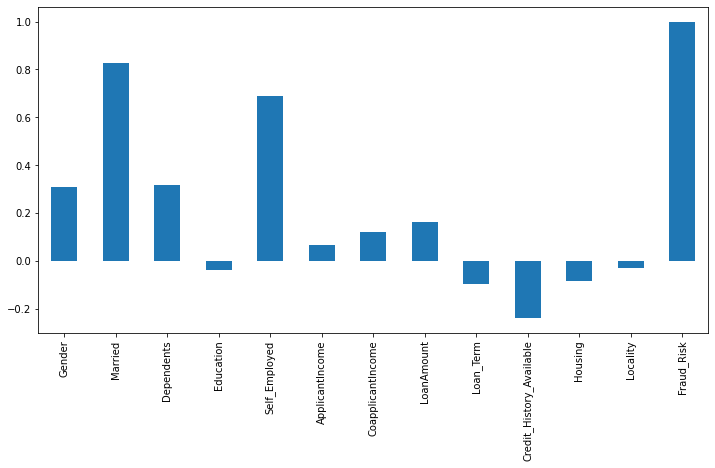

In [10]:
plt.figure(figsize=(12,6))
cor.plot(kind="bar")
plt.show()

In [ ]:
**Observation**
There is a  positive correlation between 'Married' & 'Self_Employed' with  target variable 'Fraud_Risk'
that is from the given data being married and self employed , chances of being a defaulter is more.


In [11]:
col= df.columns
col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Term',
       'Credit_History_Available', 'Housing', 'Locality', 'Fraud_Risk'],
      dtype='object')

In [13]:
for column in df.columns[:]:
    print(column,": ",df[column].unique())

Gender :  [1 0]
Married :  [0 1]
Dependents :  [0 1 2 3]
Education :  [1 0]
Self_Employed :  [0 1]
ApplicantIncome :  [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538  2980  1863  7933  3089  4167
  9323

In [14]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,0.733978,0.481258,0.652963,0.790810,0.574365,5212.970979,1486.050786,140.892382,338.128174,0.885127,0.654172,1.978235,0.576784
std,0.442143,0.499951,0.935835,0.406976,0.494738,5593.713304,2802.847983,79.820451,75.353151,0.319062,0.475925,0.771471,0.494368
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2894.500000,0.000000,100.000000,360.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,3752.000000,0.000000,125.000000,360.000000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,5478.000000,2177.000000,156.500000,360.000000,1.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,3.000000,1.000000


In [ ]:
columns 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount has huge variation in min and max amount so trying to plot box plot

******* ApplicantIncome *******


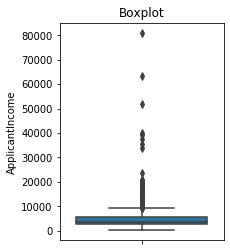

******* CoapplicantIncome *******


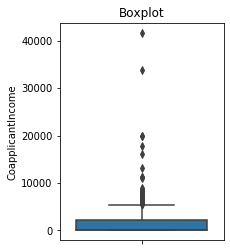

******* LoanAmount *******


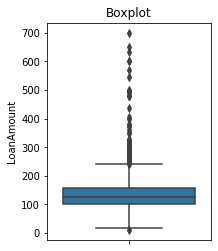

In [16]:
col= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for var in col:
  print("******* {} *******".format(var))
  plt.figure(figsize=(10, 4))
  plt.subplot(1, 3, 3)
  sns.boxplot(y= df[var])
  plt.title('Boxplot')
  plt.show()

In [ ]:
#seperating the testing and training dataset

In [18]:
x = df.drop(['Fraud_Risk'],axis=1)
y = df['Fraud_Risk']
print(x.shape)
print(y.shape)

(827, 12)
(827,)


In [ ]:
#Splitting data for training and testing



In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#standardising the data

In [20]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit_transform(x_train)

array([[ 0.60266703, -0.97944986, -0.72775888, ...,  0.36209869,
         0.7469615 ,  1.37422848],
       [ 0.60266703,  1.02098131, -0.72775888, ..., -2.76167805,
         0.7469615 ,  1.37422848],
       [-1.65929104, -0.97944986,  0.3508171 , ...,  0.36209869,
         0.7469615 , -1.24291834],
       ...,
       [-1.65929104, -0.97944986, -0.72775888, ...,  0.36209869,
         0.7469615 ,  0.06565507],
       [-1.65929104,  1.02098131, -0.72775888, ...,  0.36209869,
        -1.33875708,  0.06565507],
       [-1.65929104, -0.97944986,  0.3508171 , ...,  0.36209869,
         0.7469615 ,  1.37422848]])

In [21]:
#Applying machine Algorithms

In [22]:
# Applying GaussianNB Algorithm
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
test_predict=gnb.predict(x_test)
train_predict=gnb.predict(x_train)

In [24]:
Score_GNB_train=gnb.score(x_train,y_train)
Score_GNB_test=gnb.score(x_test,y_test)
print(Score_GNB_train)
print(Score_GNB_test)

0.903114186851211
0.8995983935742972


In [25]:
# Applying SVC Algorithm
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
train_predict_SVC= model.predict(x_train)
test_predict_SVC=model.predict(x_test)

In [27]:
Score_SVC_train=model.score(x_train,y_train)
Score_SVC_test=model.score(x_test,y_test)
print(Score_SVC_train)
print(Score_SVC_test)

0.657439446366782
0.6104417670682731


In [28]:
# Applying KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
test_pred_knn=knn.predict(x_test)
train_pred_knn=knn.predict(x_train)

In [30]:
Score_KNN_train=knn.score(x_train,y_train)
Score_KNN_test=knn.score(x_test,y_test)
print(Score_KNN_train)
print(Score_KNN_test)

0.8027681660899654
0.6586345381526104


In [31]:
# Applying DecisionTree Algorithm
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
train_DT_predict= clf.predict(x_train)
test_DT_predict=clf.predict(x_test)

In [33]:
Score_DT_train=clf.score(x_train,y_train)
Score_DT_test=clf.score(x_test,y_test)
print(Score_DT_train)
print(Score_DT_test)

1.0
0.9116465863453815


In [34]:
# Applying RandomForest Algorithm
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
train_predict_rfc= rfc.predict(x_train)
test_predict_rfc=rfc.predict(x_test)

In [36]:
Score_RFC_train=rfc.score(x_train,y_train)
Score_RFC_test=rfc.score(x_test,y_test)
print(Score_RFC_train)
print(Score_RFC_test)

1.0
0.9397590361445783


In [37]:
# Applying LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=50)
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [39]:
Score_LR_train=lg.score(x_train,y_train)
Score_LR_test=lg.score(x_test,y_test)
print(Score_LR_train)
print(Score_LR_test)

0.9013840830449827
0.8674698795180723


In [40]:
from pandas.core.frame import DataFrame
Model_Comparison = DataFrame({
    'Model' : ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','Gaussian NB'],
    'Scores_test': [Score_LR_test,Score_SVC_test,Score_KNN_test,Score_DT_test,Score_RFC_test,Score_GNB_test],
    'Scores_train': [Score_LR_train,Score_SVC_train,Score_KNN_train,Score_DT_train,Score_RFC_train,Score_GNB_train]
    })
Model_Comparison

,Model,Scores_test,Scores_train
0,Logistic Regression,0.867470,0.901384
1,SVM,0.610442,0.657439
2,KNN,0.658635,0.802768
3,Decision Tree,0.911647,1.000000
4,Random Forest,0.939759,1.000000
5,Gaussian NB,0.899598,0.903114


In [41]:
Model_Comparison_df = Model_Comparison.sort_values(by= 'Scores_test', ascending=False)
Model_Comparison_df.reset_index()[Model_Comparison_df.columns]

,Model,Scores_test,Scores_train
0,Random Forest,0.939759,1.000000
1,Decision Tree,0.911647,1.000000
2,Gaussian NB,0.899598,0.903114
3,Logistic Regression,0.867470,0.901384
4,KNN,0.658635,0.802768
5,SVM,0.610442,0.657439


**Random Forest** is giving highest accuracy here, so generating  the classification_report and confusion Matrix for the same.

In [ ]:
#predicting the values using random forest

In [51]:
rfc.predict([[1,0,0,1,0,5849,0,146,360,1,1,1]])

array([0], dtype=int64)

In [53]:
rfc.predict([[1,1,1,1,1,4583,1508,128,360,1,1,3]])

array([1], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
cr = classification_report(y_train,train_predict_rfc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       338

    accuracy                           1.00       578
   macro avg       1.00      1.00      1.00       578
weighted avg       1.00      1.00      1.00       578



In [44]:
cr = classification_report(y_test,test_predict_rfc)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       110
           1       0.99      0.90      0.94       139

    accuracy                           0.94       249
   macro avg       0.94      0.95      0.94       249
weighted avg       0.95      0.94      0.94       249



In [45]:
from sklearn.metrics import confusion_matrix
conf_matix = confusion_matrix(y_test,test_predict_rfc)
conf_matix

array([[109,   1],
       [ 14, 125]], dtype=int64)

In [ ]:
#checking for the important features

In [47]:
rfc.feature_importances_

array([0.04508975, 0.36833659, 0.03044994, 0.00945251, 0.20682345,
       0.0893852 , 0.05216049, 0.08401133, 0.03170454, 0.04918224,
       0.01087918, 0.02252479])

In [48]:
x1=pd.DataFrame(rfc.feature_importances_,columns=["Scores"])
x2=pd.DataFrame(x_train.columns,columns=["Names"])
score_rfc=pd.concat([x2,x1],axis=1)
score_rfc.sort_values("Scores",ascending=False).head()

,Names,Scores
1,Married,0.368337
4,Self_Employed,0.206823
5,ApplicantIncome,0.089385
7,LoanAmount,0.084011
6,CoapplicantIncome,0.052160


In [ ]:
# **Conclution
The best driving features for the Loan default analysis are Married,Self_Employed, ApplicantIncome, LoanAmount & Credit_History_Available.
Take into consideration of marital status and self employement while providing the loan
